In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

ModuleNotFoundError: No module named 'pandas'

## Mastering Airfoil Design, Part (i): Plotting the $C_L$ vs $\alpha$ Curves for the Four Airfoils

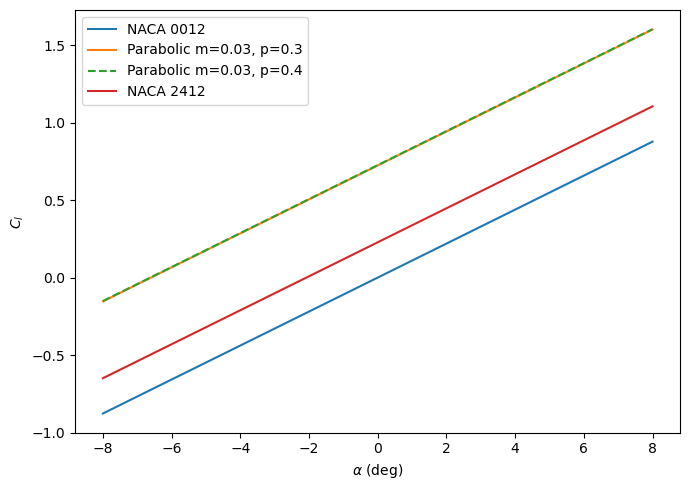

In [2]:
alpha_deg = np.linspace(-8, 8, 200)
alpha = np.deg2rad(alpha_deg)

Cl_0012 = 2*np.pi*alpha
Cl_m003_p03 = 2*np.pi*(alpha + 0.1152)
Cl_m003_p04 = 2*np.pi*(alpha + 0.1155)
Cl_2412 = 2*np.pi*(alpha + 0.03625)

plt.figure(figsize=(7,5))
plt.plot(alpha_deg, Cl_0012, label="NACA 0012")
plt.plot(alpha_deg, Cl_m003_p03, label="Parabolic m=0.03, p=0.3")
plt.plot(alpha_deg, Cl_m003_p04, label="Parabolic m=0.03, p=0.4",linestyle="--")
plt.plot(alpha_deg, Cl_2412, label="NACA 2412")
plt.xlabel(r"$\alpha$ (deg)")
plt.ylabel(r"$C_l$")
plt.legend()
plt.tight_layout()
plt.show()

## Mastering Airfoil Design, Part (ii): Plotting Experimental NACA 2412 Airfoil Data and XFLR5 Simulation Data Against Thin-Airfoil-Theory Results

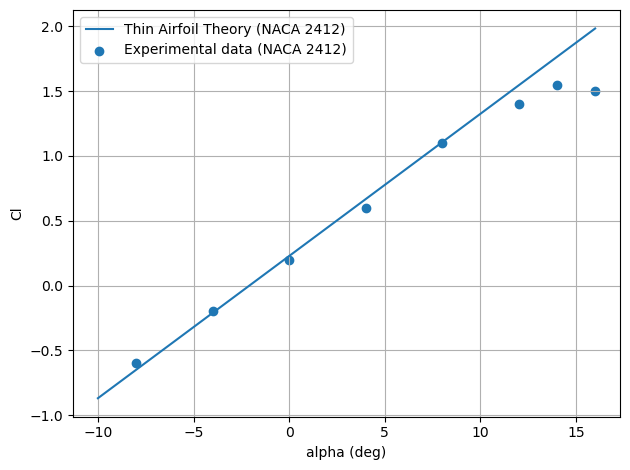

<Figure size 640x480 with 0 Axes>

In [3]:
alpha_deg = np.linspace(-10, 16, 300)
alpha_rad = np.deg2rad(alpha_deg)
Cl_TAT = 2 * np.pi * (alpha_rad + 0.03625)

alpha_exp = np.array([-8, -4, 0, 4, 8, 12, 14, 16], dtype=float)
Cl_exp = np.array([-0.6, -0.2, 0.2, 0.6, 1.1, 1.4, 1.55, 1.50], dtype=float)

plt.figure()
plt.plot(alpha_deg, Cl_TAT, label="Thin Airfoil Theory (NACA 2412)")
plt.scatter(alpha_exp, Cl_exp, label="Experimental data (NACA 2412)", marker="o")
plt.xlabel("alpha (deg)")
plt.ylabel("Cl")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
plt.savefig("NACA2412_TAT_vs_experiment.pdf")



In [ ]:
url_Re1 = "https://raw.githubusercontent.com/akot2/AE311-Final-Group-Project/master/T1_Re1.000_M0.00_N9.0.csv"
url_Re3 = "https://raw.githubusercontent.com/akot2/AE311-Final-Group-Project/master/T1_Re3.000_M0.00_N9.0.csv"
url_Re6 = "https://raw.githubusercontent.com/akot2/AE311-Final-Group-Project/master/T1_Re6.000_M0.00_N9.0.csv"
url_Re9 = "https://raw.githubusercontent.com/akot2/AE311-Final-Group-Project/master/T1_Re9.000_M0.00_N9.0.csv"
Re1 = pd.read_csv(url_Re1, delimiter = ',', header = 10).to_numpy()
Re3 = pd.read_csv(url_Re3, delimiter = ',', header = 10).to_numpy()
Re6 = pd.read_csv(url_Re6, delimiter = ',', header = 10).to_numpy()
Re9 = pd.read_csv(url_Re9, delimiter = ',', header = 10).to_numpy()

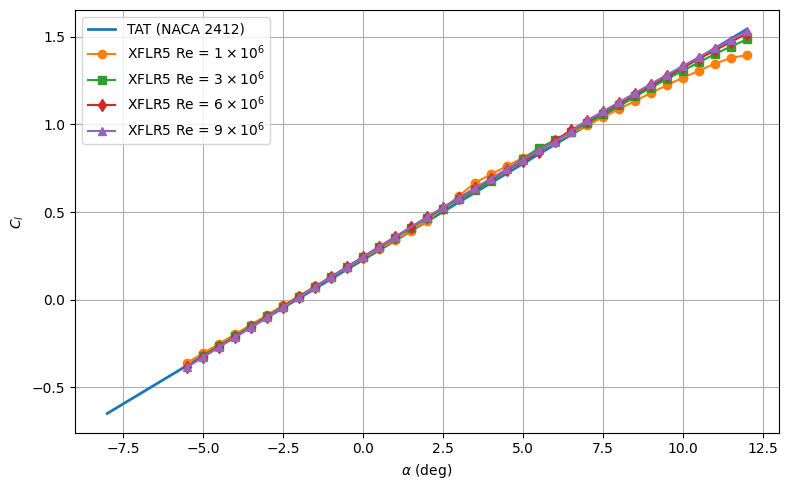

In [ ]:
alpha1, Cl1 = Re1[:, 0], Re1[:, 1]
alpha3, Cl3 = Re3[:, 0], Re3[:, 1]
alpha6, Cl6 = Re6[:, 0], Re6[:, 1]
alpha9, Cl9 = Re9[:, 0], Re9[:, 1]

alpha_deg = np.linspace(min(alpha1.min(), -8), max(alpha1.max(), 12), 300)
alpha_rad = np.deg2rad(alpha_deg)
Cl_TAT = 2 * np.pi * (alpha_rad + 0.03625)   # from part (i)

plt.figure(figsize=(8,5))

plt.plot(alpha_deg, Cl_TAT, label="TAT (NACA 2412)", linewidth=2)

plt.plot(alpha1, Cl1, 'o-', label=r"XFLR5 Re = $1\times10^6$")
plt.plot(alpha3, Cl3, 's-', label=r"XFLR5 Re = $3\times10^6$")
plt.plot(alpha6, Cl6, 'd-', label=r"XFLR5 Re = $6\times10^6$")
plt.plot(alpha9, Cl9, '^-', label=r"XFLR5 Re = $9\times10^6$")

plt.xlabel(r'$\alpha$ (deg)')
plt.ylabel(r'$C_l$')
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()


## Mastering Airfoil Design, Part (iii): Plotting Discrete Vortex Panel and Element Method

In [ ]:
def diff(x):
    return x[1:] - x[:-1]

def vortex_panel_CL(coords, alpha_deg):
    x = coords[:,0]
    y = coords[:,1]
    n = len(x) - 1

    alpha = np.deg2rad(alpha_deg)

    x_c = 0.5 * (x[:-1] + x[1:])
    y_c = 0.5 * (y[:-1] + y[1:])

    dx = diff(x)
    dy = diff(y)
    S = np.sqrt(dx**2 + dy**2)
    theta = np.arctan2(dy, dx)

    Cn1 = np.zeros((n, n))
    Cn2 = np.zeros((n, n))
    Ct1 = np.zeros((n, n))
    Ct2 = np.zeros((n, n))

    A_n = np.zeros((n+1, n+1))
    A_t = np.zeros((n+1, n+1))
    RHS = np.zeros((n+1, 1))

    for i in range(n):
        for j in range(n):
            if j != i:
                Xj = x[j]
                Yj = y[j]

                A = -(x_c[i] - Xj) * np.cos(theta[j]) - (y_c[i] - Yj) * np.sin(theta[j])
                B = (x_c[i] - Xj)**2 + (y_c[i] - Yj)**2
                C = np.sin(theta[i] - theta[j])
                D = np.cos(theta[i] - theta[j])
                E = (x_c[i] - Xj) * np.sin(theta[j]) - (y_c[i] - Yj) * np.cos(theta[j])
                F = np.log(1 + (S[j]**2 + 2*A*S[j]) / B)
                G = np.arctan2(E*S[j], B + A*S[j])
                P = (x_c[i] - Xj) * np.sin(theta[i] - 2*theta[j]) + (y_c[i] - Yj) * np.cos(theta[i] - 2*theta[j])
                Q = (x_c[i] - Xj) * np.cos(theta[i] - 2*theta[j]) - (y_c[i] - Yj) * np.sin(theta[i] - 2*theta[j])

                Cn2[i,j] = D + 0.5 * Q * F / S[j] - (A*C + D*E) * G / S[j]
                Cn1[i,j] = 0.5*D*F + C*G - Cn2[i,j]
                Ct2[i,j] = C + 0.5 * P * F / S[j] + (A*D - C*E) * G / S[j]
                Ct1[i,j] = 0.5*C*F - D*G - Ct2[i,j]

            else:
                Cn1[i,j] = -1.0
                Cn2[i,j] = 1.0
                Ct1[i,j] = 0.5 * np.pi
                Ct2[i,j] = 0.5 * np.pi

            if j == 0:
                A_n[i,j] = Cn1[i,j]
                A_t[i,j] = Ct1[i,j]
            else:
                A_n[i,j] = Cn1[i,j] + Cn2[i,j-1]
                A_t[i,j] = Ct1[i,j] + Ct2[i,j-1]

        A_n[i, n] = Cn2[i, n-1]
        A_t[i, n] = Ct2[i, n-1]
        RHS[i,0] = np.sin(theta[i] - alpha)

    A_n[n,0] = 1.0
    A_n[n,n] = 1.0

    Gamma = np.linalg.solve(A_n, RHS)

    Vtan = np.cos(theta - alpha).reshape(-1,1) + A_t[:n,:] @ Gamma
    Cp = 1 - Vtan**2

    gamma_p = 0.5 * (Gamma[:-1,0] + Gamma[1:,0])
    Gamma_tot = np.sum(gamma_p * S)

    c = np.max(x) - np.min(x)
    CL = 2*np.pi * Gamma_tot / c

    return CL, Cp, x_c, n

coords_base = np.loadtxt("coords.csv", delimiter=",")
CL0, Cp0, x_c0, N0 = vortex_panel_CL(coords_base, alpha_deg=0.0)
print("Panels:", N0)
print("CL(0 deg) =", CL0)

coords_base = np.loadtxt("coords.csv", delimiter=",")

def make_subsampled_coords(coords, step):
    out = coords[::step].copy()
    if not np.allclose(out[-1], coords[-1]):
        out = np.vstack([out, coords[-1]])
    return out

alpha_conv = 4.0
steps = [3, 2, 1]

num_panels_list = []
CL_list = []

for s in steps:
    sub = make_subsampled_coords(coords_base, s)
    CL_s, _, _, N_s = vortex_panel_CL(sub, alpha_conv)
    num_panels_list.append(N_s)
    CL_list.append(CL_s)
    print(f"step={s:2d}, panels={N_s:3d}, CL={CL_s:.4f}")

plt.figure()
plt.plot(num_panels_list, CL_list, marker="o")
plt.xlabel("Number of panels")
plt.ylabel(r"$C_L$ at $\alpha = %.1f^\circ$" % alpha_conv)
plt.title("Vortex-panel convergence")
plt.legend()
plt.tight_layout()
plt.show()

## Designing the Wing, Part I: Plotting $C_L$ vs $\alpha$ for Three Finite Span Wings

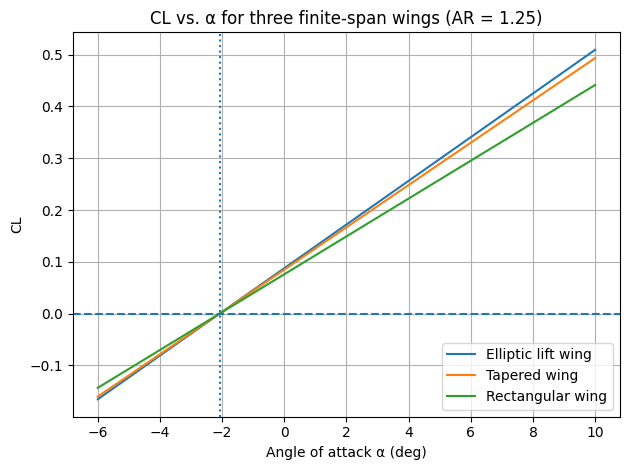

(2.41660973353061, 2.3407945262041596, 2.0943951023931953, -2.077286907035209)

In [ ]:
AR = 1.25
a0 = 2 * math.pi  # 2D lift slope (rad^-1)
alpha_L0_rad = -0.2278 / (2 * math.pi)
alpha_L0_deg = alpha_L0_rad * 180 / math.pi

e_ell = 1.0
e_tap = 0.95
e_rect = 0.8

def a_w(e):
    return a0 / (1 + a0 / (math.pi * e * AR))

a_ell = a_w(e_ell)
a_tap = a_w(e_tap)
a_rect = a_w(e_rect)

alpha_deg = np.linspace(-6, 10, 200)
alpha_rad = np.deg2rad(alpha_deg)

CL_ell = a_ell * (alpha_rad - alpha_L0_rad)
CL_tap = a_tap * (alpha_rad - alpha_L0_rad)
CL_rect = a_rect * (alpha_rad - alpha_L0_rad)

plt.figure()
plt.plot(alpha_deg, CL_ell, label="Elliptic lift wing")
plt.plot(alpha_deg, CL_tap, label="Tapered wing")
plt.plot(alpha_deg, CL_rect, label="Rectangular wing")
plt.axhline(0, linestyle="--")
plt.axvline(alpha_L0_deg, linestyle=":")
plt.xlabel("Angle of attack α (deg)")
plt.ylabel("CL")
plt.title("CL vs. α for three finite-span wings (AR = 1.25)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

a_ell, a_tap, a_rect, alpha_L0_deg


##Designing the Wing, Part II: Using XFLR5 to Compare Results

In [ ]:
S = 2.5*0.5 # m^2
b = 2 # m
lam_taper = 0.4285714

c_root = (2*S)/(b*(1 + lam_taper))
c_tip = lam_taper*c_root
print(f"Root Chord Length: {c_root} m\nTip Chord Length: {c_tip} m")

Root Chord Length: 0.8750000175000003 m
Tip Chord Length: 0.37499998249999966 m


In [ ]:
url_NACA2412 = "https://raw.githubusercontent.com/akot2/AE311-Final-Group-Project/master/T1-10_0m_s-Panel-Inviscid.csv"
NACA2412data = pd.read_csv(url_NACA2412, delimiter = ',', header = 7).to_numpy()
alpha = NACA2412data[:, 0]
CL = NACA2412data[:, 2]
CD = NACA2412data[:, 5]

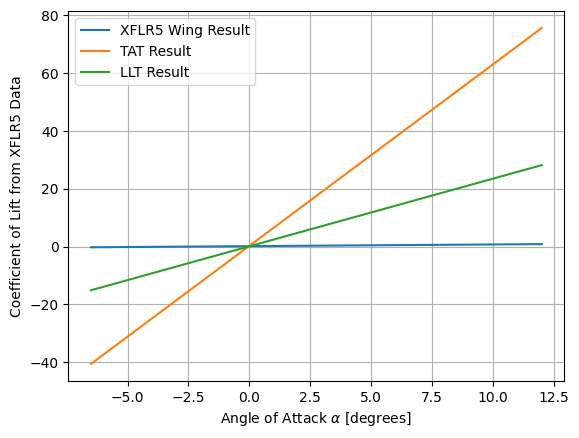

In [ ]:
CL_2412 = 2*np.pi*(alpha + 0.03625)

AR = 1.25
a0 = 2 * np.pi  # 2D lift slope (rad^-1)
alpha_L0_rad = -0.2278 / (2 * np.pi)

e_tap = 0.95

def a_w(e):
    return a0 / (1 + a0 / (np.pi * e * AR))

a_tap = a_w(e_tap)
CL_tap = a_tap * (alpha - alpha_L0_rad)

plt.figure()
plt.plot(alpha, CL, label = "XFLR5 Wing Result")
plt.plot(alpha, CL_2412, label = "TAT Result")
plt.plot(alpha, CL_tap, label = "LLT Result")
plt.xlabel(r'Angle of Attack $\alpha$ [degrees]')
plt.ylabel(r'Coefficient of Lift from XFLR5 Data')
# plt.title(r'$c_L$ vs $\alpha$ for NACA2412 Wing')
# plt.yscale('symlog')
plt.legend()
plt.grid(True)
plt.show()

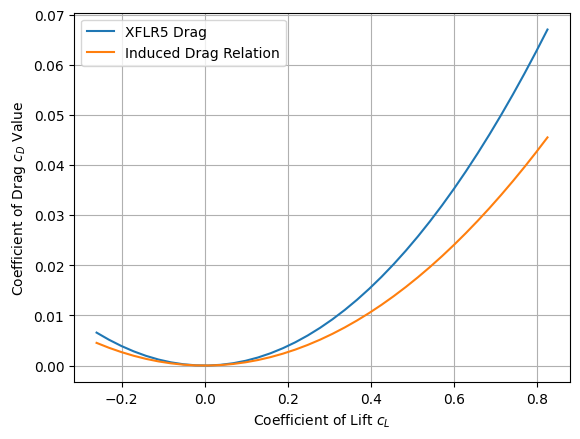

In [ ]:
plt.figure()
plt.plot(CL, CD, label = 'XFLR5 Drag')
CDi = (CL**2)*(1+0.0485)/(np.pi*5)
plt.plot(CL, CDi, label = "Induced Drag Relation")
plt.xlabel(r"Coefficient of Lift $c_L$")
plt.ylabel(r"Coefficient of Drag $c_D$ Value")
# plt.title(r"XFLR5 Coefficient of Drag and Induced Drag Coefficient vs Coefficient of Lift")
plt.grid(True)
plt.legend()
plt.show()